## Looking at Data

In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
%pwd

'/notebooks/course-v3/nbs/dl1'

In [14]:
from fastai.vision import *
from fastai.metrics import error_rate

In [15]:
bs = 48

In [16]:
path = untar_data(URLs.CIFAR)

In [17]:
path

PosixPath('/notebooks/course-v3/nbs/dl1/data/cifar10')

In [18]:
path.ls()

[PosixPath('/notebooks/course-v3/nbs/dl1/data/cifar10/test'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/cifar10/train'),
 PosixPath('/notebooks/course-v3/nbs/dl1/data/cifar10/labels.txt')]

In [19]:
path_test = path/'test'
path_train = path/'train'

In [21]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', test:Union[pathlib.Path, str, NoneType]=None, valid_pct=None, seed:int=None, classes:Collection=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [29]:
data = ImageDataBunch.from_folder(path,ds_tfms=get_transforms(do_flip=False), valid_pct=0.2, size=224).normalize(imagenet_stats)

In [30]:
help(data.show_batch)

Help on method show_batch in module fastai.basic_data:

show_batch(rows:int=5, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>, reverse:bool=False, **kwargs) -> None method of fastai.vision.data.ImageDataBunch instance
    Show a batch of data in `ds_type` on a few `rows`.



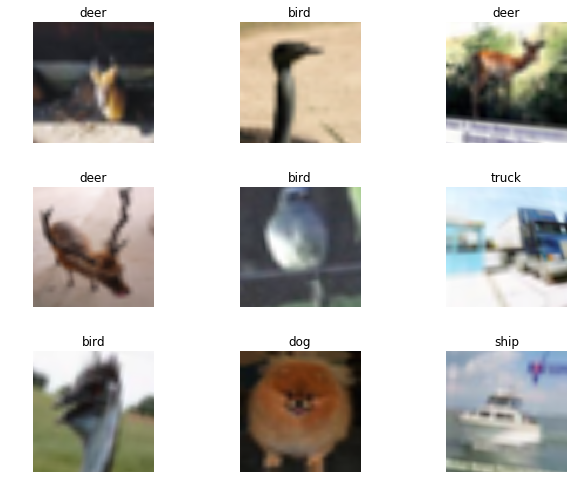

In [31]:
data.show_batch(rows=3,figsize=(9,7))

In [40]:
print(data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Training

In [32]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [33]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (29945 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
truck,truck,truck,truck,truck
Path: /notebooks/course-v3/nbs/dl1/data/cifar10;

Valid: LabelList (7486 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bird,deer,dog,automobile,ship
Path: /notebooks/course-v3/nbs/dl1/data/cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): B

In [41]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.576922,0.325998,0.110339,03:33
1,0.363016,0.200500,0.065456,03:30
2,0.251424,0.157295,0.055170,03:30
3,0.214704,0.146228,0.051162,03:30


In [57]:
learn.save('stage-1')

## Results

In [58]:
help(ClassificationInterpretation.from_learner)

Help on method _cl_int_from_learner in module fastai.vision.learner:

_cl_int_from_learner(learn:fastai.basic_train.Learner, ds_type:fastai.basic_data.DatasetType=<DatasetType.Valid: 2>, activ:torch.nn.modules.module.Module=None, tta=False) method of builtins.type instance
    Create an instance of `ClassificationInterpretation`. `tta` indicates if we want to use Test Time Augmentation.



In [59]:
interp = ClassificationInterpretation.from_learner(learn)

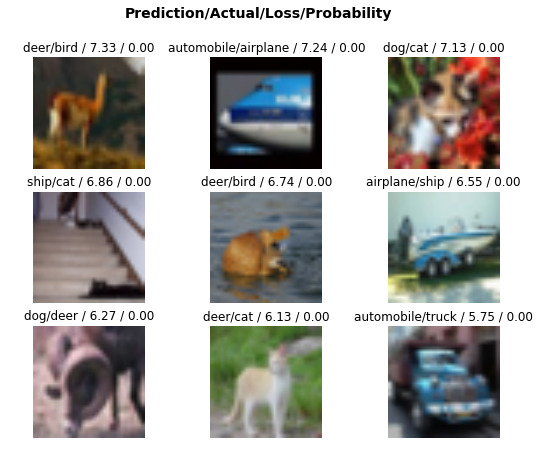

In [60]:
interp.plot_top_losses(9,figsize=(9,7))

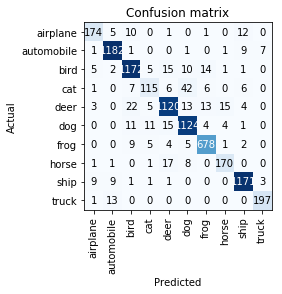

In [61]:
interp.plot_confusion_matrix()

In [62]:
interp.most_confused(min_val=9)

[('cat', 'dog', 42),
 ('deer', 'bird', 22),
 ('horse', 'deer', 17),
 ('bird', 'deer', 15),
 ('deer', 'horse', 15),
 ('dog', 'deer', 15),
 ('bird', 'frog', 14),
 ('deer', 'dog', 13),
 ('deer', 'frog', 13),
 ('truck', 'automobile', 13),
 ('airplane', 'ship', 12),
 ('dog', 'bird', 11),
 ('dog', 'cat', 11),
 ('airplane', 'bird', 10),
 ('bird', 'dog', 10),
 ('automobile', 'ship', 9),
 ('frog', 'bird', 9),
 ('ship', 'airplane', 9),
 ('ship', 'automobile', 9)]

## Unfreezing, Fine_tuning, Learning Rate

In [63]:
learn.unfreeze()

In [64]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.225572,0.138354,0.048758,04:56


In [65]:
learn.save('unfreeze-1')

In [66]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


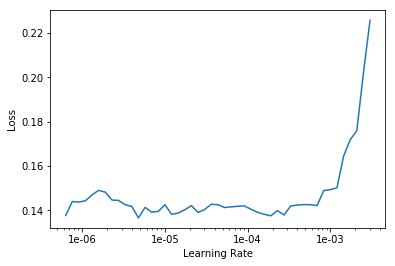

In [67]:
learn.recorder.plot()

In [68]:
learn.unfreeze()

In [70]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.161770,0.142590,0.045552,04:56
1,0.072909,0.106820,0.031526,04:56


In [71]:
interp = ClassificationInterpretation.from_learner(learn)

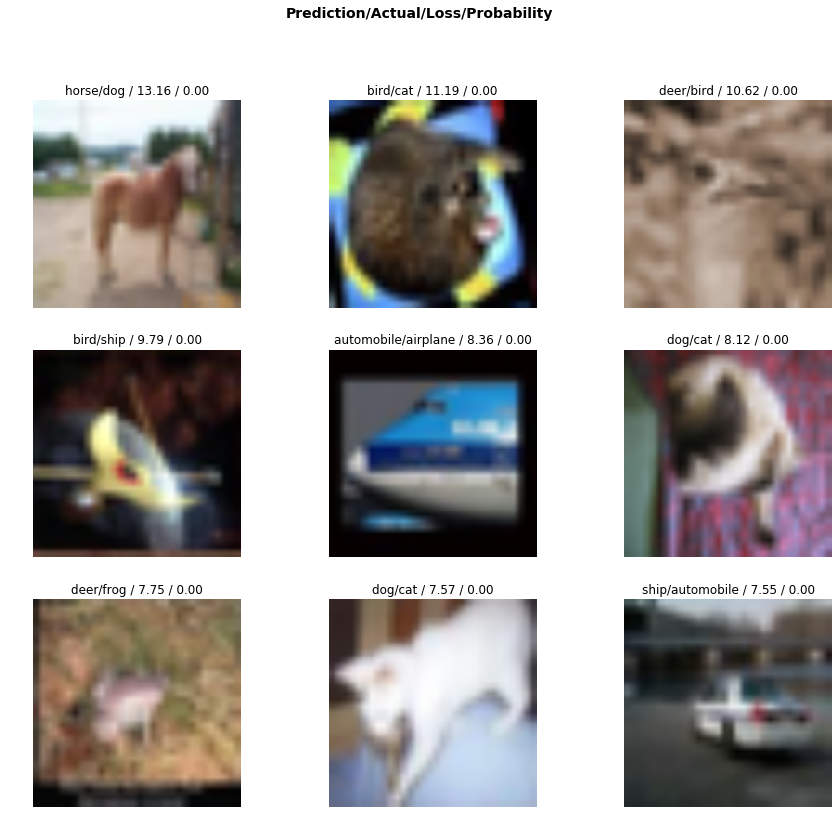

In [74]:
interp.plot_top_losses(9,figsize=(15,13))

In [75]:
learn.save('stage-2')

Preety Accurate Model!!